# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [181]:
import pandas as pd #Импортирую библиотеку pandas
data = pd.read_csv('/datasets/real_estate_data.csv') #Читаю файл с данными
print(data.head()) #Печатаю первые 5 строк для ознакомления с данными
print()
print('Данные в исходной таблице переданы с разделителем, от него следует избавиться')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',') #Читаю файл с данными, удаляю разделитель
print(data.head()) #Печатаю первые 5 строк для ознакомления с данными
print()
data.info() #Получаю сводную информацию о data
print()
#Проверяю уникальные значения в интересующих меня стобцах ниже
print('Уникальные значения в столбце "Число комнат": ', data['rooms'].unique())
print('Уникальные значения в столбце "Всего этажей в доме": ', data['floors_total'].unique())
print('Уникальные значения в столбце "Этаж": ', data['floor'].unique())
print('Уникальные значения в столбце "Апартаменты": ', data['is_apartment'].unique())
print('Уникальные значения в столбце "Число балконов": ', data['balcony'].unique())
print()
print('Проверка артефактов в столбце "Число комнат":')
print(data['rooms'].value_counts())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

### Вывод

Рассмотрим полученную информацию подробнее. Всего в таблице 22 столбца и 23699 строк, типы данных в таблице: int64, object, bool. Подробно разберём, какие в data столбцы и какую информацию они содержат:
##### airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
##### balcony — число балконов
##### ceiling_height — высота потолков (м)
##### cityCenters_nearest — расстояние до центра города (м)
##### days_exposition — сколько дней было размещено объявление (от публикации до снятия)
##### first_day_exposition — дата публикации
##### floor — этаж
##### floors_total — всего этажей в доме
##### is_apartment — апартаменты (булев тип)
##### kitchen_area — площадь кухни в квадратных метрах (м²)
##### last_price — цена на момент снятия с публикации
##### living_area — жилая площадь в квадратных метрах(м²)
##### locality_name — название населённого пункта
##### open_plan — свободная планировка (булев тип)
##### parks_around3000 — число парков в радиусе 3 км
##### parks_nearest — расстояние до ближайшего парка (м)
##### ponds_around3000 — число водоёмов в радиусе 3 км
##### ponds_nearest — расстояние до ближайшего водоёма (м)
##### rooms — число комнат
##### studio — квартира-студия (булев тип)
##### total_area — площадь квартиры в квадратных метрах (м²)
##### total_images — число фотографий квартиры в объявлении
Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения. Также возможно наличите дубликатов и артефактов. Все это будет обработано на следующем этапе. По некоторым стоблцам рассмотрены уникальные значения, в частности, столбец "Число комнат" включает в себя неправдоподобные значения, такие как 0 и >=10 (0 вероятнее всего - неявный пропуск).

### Шаг 2. Предобработка данных

In [182]:
#В столбце "название населённого пункта" есть 49 элементов NaN, поскольку заполнить их достоверными данными невозможно,
#удалим эти строки
data.dropna(subset = ['locality_name'], inplace = True)
print('После удажения строк с ниезвестным названием населённого пункта в таблице осталось', len(data), 'строк.')
#В столбце "высота потолков" данные имеют тип object прежде чем производить заполнение NaN, перевиду их в тип float
def type_convert(data,column, d_type): #объявляю функцию конвертирования типов данных
    data[column] = data[column].astype(d_type)

type_convert(data,'ceiling_height','float')
#В столбце "высота потолков" есть множество элементов NaN, заменю их на среднее значение по данному столбцу
data['ceiling_height'] =  data['ceiling_height'].fillna(data['ceiling_height'].mean())
print('Количество NaN в столбце "Высота потолков" после заполнения:', data['ceiling_height'].isnull().sum())

#Прежде чем заполнять пропуски в столбцах "Жилая площадь" и "Площадь кухни", приведу эти данные к типу float 
type_convert(data,'total_area','float')
type_convert(data,'living_area','float')
type_convert(data,'kitchen_area','float')

S_liv = (data['living_area']/data['total_area']).mean() #Среднее отношение жилой площади к общей площади
print('Среднее отношение жилой площади к общей площади:',S_liv)
S_kitch = (data['kitchen_area']/data['total_area']).mean() #Среднее отношение жилой площади к общей площади
print('Среднее отношение площади кухни к общей площади:',S_kitch)
data['living_area'] = data['living_area'].fillna(S_liv*(data['total_area'])) #Заполняю пропуски в столбце "Жилая площадь"
data['kitchen_area'] = data['kitchen_area'].fillna(S_kitch*data['total_area']) #Заполняю пропуски в столбце "Площадь кухни"

#Заполню пропуски в столбце "Апартаменты" исходя из того, что NaN==False, т.е. квартира не является апартаментами
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Уникальные значения в столбце "Апартаменты": ', data['is_apartment'].unique()) #Проверяю заполнение

#Заполню пропуски в столбце "Всего этажей в доме" исходя из того, что квартиры находятся не на последнем этаже
data['floors_total'] = data['floors_total'].fillna(data['floor'] + 1)
type_convert(data,'floors_total','float') #Перевожу данные в тип float
data['floors_total'] = data['floors_total'].astype('int')  #Перевожу данные в тип int
#Заполню пропуски в столбце "Сколько дней было размещено объявление" средним значением
type_convert(data,'days_exposition','float') #Перевожу данные в тип float
#Заполняю пропуски, перевожу данные в тип int
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].mean()).astype('int') 

#Для работы со столбцом "Название населённого пункта" привожу все данные к одному виду - нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

#В столбце "Дата публикации" данные имеют тип object переведу их в тип datetime, отбросив время размещения, поскольку там нули
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

#В столбце "Число балконов" данные имеют тип object прежде чем произвлжить заполнение NaN, переведу их в тип float
type_convert(data,'balcony','float')
data['balcony'] =  data['balcony'].fillna('0') #В столбце "Число балконов" есть множество элементов NaN, заменю их на "0"
data['balcony'] = data['balcony'].astype('int')  #Перевожу данные в тип int
print('Уникальные значения в столбце "Число балконов" после запонения NaN:', data['balcony'].unique()) #Проверяю заполнение

#В столбце "Цена на момент снятия с публикации" перевожу данные в тип float
type_convert(data,'last_price','float')

#Заменю неявные пропуске в столбце "Число комнат", поскольку не бывает квартир с 0 комнат, даже студии позиционируются как 1-к
#data['rooms'] = data['rooms'].replace(0,1) # Передумал! Оставлю как есть, в дальнейшем отбросим эти данные.
#print('Уникальные значения в столбце "Число комнат" после замены:', data['rooms'].unique())
print()
print('Количество дубликатов в таблице:', data.duplicated().sum()) #Выявляю дублирующиеся строки
print()
data.info()
print()
#А сюда я вернулся из самого конца проекта, чтобы изменить тип данных в столбце "Расстояние до центра города"
type_convert(data,'cityCenters_nearest','float')
print(data.head(10)) #Для проверки глянем на 10 первых строк таблицы

После удажения строк с ниезвестным названием населённого пункта в таблице осталось 23650 строк.
Количество NaN в столбце "Высота потолков" после заполнения: 0
Среднее отношение жилой площади к общей площади: 0.5647499988246565
Среднее отношение площади кухни к общей площади: 0.18737152810064503
Уникальные значения в столбце "Апартаменты":  [False  True]
Уникальные значения в столбце "Число балконов" после запонения NaN: [0 2 1 5 4 3]

Количество дубликатов в таблице: 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null 

### Вывод

На этом этапе я привел огромную таблицу к удобоваримому виду. Прежде всего удалил строки, где отсутствовали данные о населенном пункте. Таковых было всего 49 строк, что составляет 0,2% от общего объема, так что невелика потеря. Затем заполнил пропуски там, где этого требовали поставленные задачи и там, где счел нужным, а именно в столбцах: "Высота потолков", "Жилая площадь", "Площадь кухни", "Апартаменты", "Всего этажей в доме", "Сколько дней было размещено объявление", "Число балконов". Плюс к этому удалил, режущий глаз, неявный пропуск "0" в столбце "Количество комнат", заменив его на "1". Не стал заполнять пропуски в столбцах с геоданными, поскольку досоверно заполнить их не получится, а имеющихся данных хватит для подготовки выборок и решения поставленных задач. Дополнительно провел некоторые "косметические" преобразования - привел названия населенных пунктов к нижнему регистру. И конечно, поменял типы данных! Этот процесс мне почему-то особенно понравился)) поэтому теперь в таблице то что должно быть int стало int (этажи, комнаты, балконы), то что должно быть float стало float (Цены, площади, высоты потолков), bool - аппартаменты, студии, свободные планировки, ну и конечно даты публикации превратились в datetime. Все просто огонь! Однако для себя отметил особенность, что не получается перевести данные object -> int64, а нужно проделать такой путь object -> float64 -> int64... Вероятно это баг Юпитера ну или просто нюанс языка программирования. Да и вот еще, чуть не забыл - причины возникновения пропусков и неверных данных могут быть следующие: выгружены не те или неполные данные; ошибки в алгоритмах, считающих нужное значение; не тот формат предоставляемых данных; человеческий фактор, а именно неверный ввод данных при заполнении формы подачи объявлений.

### Шаг 3. Посчитайте и добавьте в таблицу

In [183]:
#Бегите, глупцы!.... э-э-э... нет... Добавляем столбцы!
#Добавляю столбец с ценой за метр квадратный
data['squre_m_price'] = data['last_price']/data['total_area']

#Добавляю столбец "День недели публикации объявления"
data['week_day_expos'] = data['first_day_exposition'].dt.weekday
#Добавляю столбец "Месяц публикации объявления"
data['month_expos'] = data['first_day_exposition'].dt.month
#Добавляю столбец "Год публикации объявления"
data['year_expos'] = data['first_day_exposition'].dt.year

#Для добавления столбца с группировкой этажей бъявляю функцию
def floor_grp(row): 
    total = row['floors_total']
    floor = row['floor']
    if floor == total:
        return 'последний'
    if floor == 1:
        return 'первый'
    else:
        return 'другой'
#Применяю функцию для определения категорий, добавляю в таблицу столбец 'floor_group'
data['floor_group'] = data.apply(floor_grp,axis=1)

#Добавляю столбцы с соотношениями
data['living/total'] = data['living_area']/data['total_area'] #Столбец с соотношением жилой площади к общей
data['kitchen/total'] = data['kitchen_area']/data['total_area'] #Столбец с соотношением площади кухни к общей

#Взглянем теперь на датасет
print('Вай! Какая красота!')
print(data.head(10))
data.info()

Вай! Какая красота!
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00           2019-03-07      3   
1             7   3350000.0       40.40           2018-12-04      1   
2            10   5196000.0       56.00           2015-08-20      2   
3             0  64900000.0      159.00           2015-07-24      3   
4             2  10000000.0      100.00           2018-06-19      2   
5            10   2890000.0       30.40           2018-09-10      1   
6             6   3700000.0       37.30           2017-11-02      1   
7             5   7915000.0       71.60           2019-04-18      2   
8            20   2900000.0       33.16           2018-05-23      1   
9            18   5400000.0       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000            16     51.00000      8         False  ...   
1        2.771287            11     18.60000      

### Вывод

На этом этапе добавлены дополнительные столбцы

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Задача 1.
Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    23650.000000
mean         2.771287
std          0.987489
min          1.000000
25%          2.600000
50%          2.771287
75%          2.771287
max        100.000000
Name: ceiling_height, dtype: float64


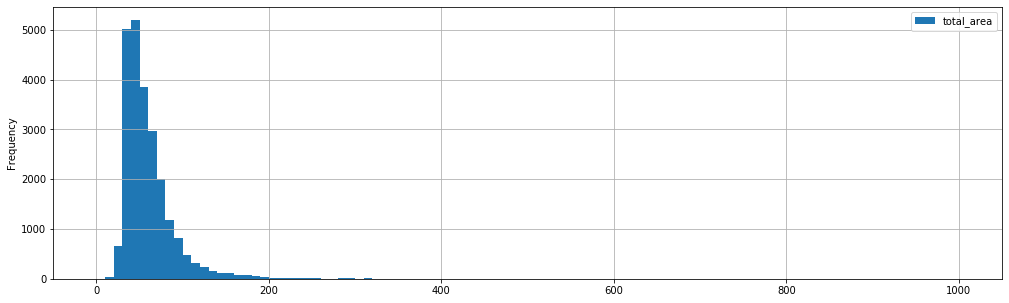

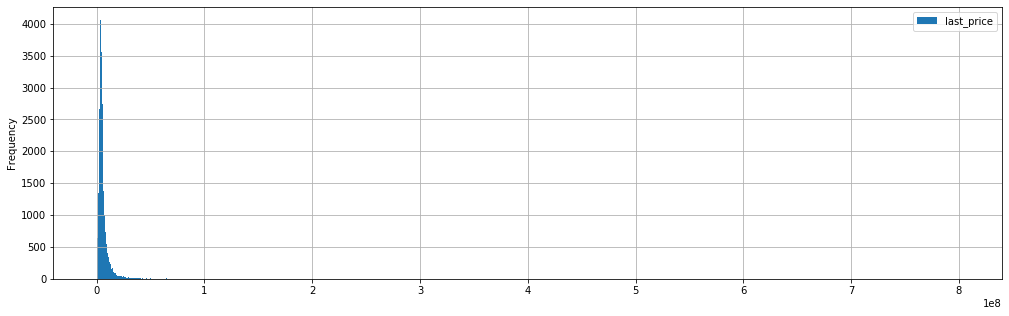

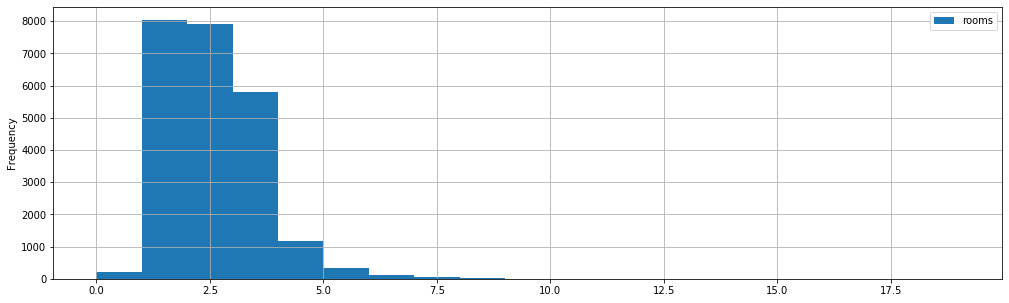

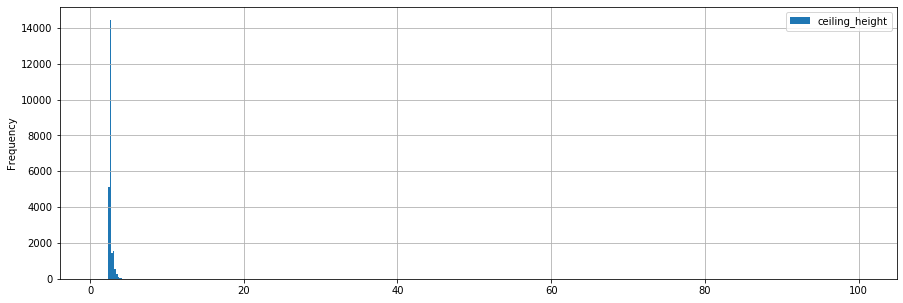

In [184]:
import matplotlib.pyplot as plt #импортирую библиотеку matplotlib.pyplot
print(data['total_area'].describe()) #Получю описание столбца
data.plot(y='total_area', kind='hist', bins=100, range=(0,1000), figsize=(17,5), grid=True) #Строю гистограмму
print()
print(data['last_price'].describe()) #Получю описание столбца
data.plot(y='last_price', kind='hist', bins=1000, range=(0,800000000), figsize=(17,5), grid=True) #Строю гистограмму
print()
print(data['rooms'].describe()) #Получю описание столбца
data.plot(y='rooms', kind='hist', bins=19, figsize=(17,5), grid=True) #Строю гистограмму
print()
print(data['ceiling_height'].describe()) #Получю описание столбца
data.plot(y='ceiling_height', kind='hist', bins=500, figsize=(15,5), grid=True) #Строю гистограмму

#### Вывод по задаче 1.
Методом .describe() получены описания данных по каждому интересующему нас столбцу. Затем построены гистограммы. Можно сделать следующие выводы: все гистограммы представляют из себя нормальное распределение; столбец "Общая площадь" содержит, на первый взгляд, объективные данные, однако, максимальное значение достигает 900 м кв., и его, из-за малой частоты даже не видно на гистрограмме, скорее всего в дальнейшем данные выходящие за диаграмму размаха будут удалены; столбец "Цена на момент снятия с публикации" аналогично с "Общая площадь" выглядит объективно, максимальное значение здесь достигает 7,63е+08, вероятно, это и есть стоимость объекта площадью 900 кв.м, но скорее всего в дальнейшем данные выходящие за диаграмму размаха будут удалены, также неправдоподнобно низкие значения достигают 12190, плюс ко всему среднее отклонение на порядок выше медианы; в столбце "Количество комнат" имеется неявный пропуск "0" комнат, и огромный максимальный показатель "19" комнат; столбец "Высота потолков" поражает максимальным значением в 100 метров, что явно является выбросом. Я решил оставить в этом пункте гистограммы, включающие в себя весь диапазон значений, чтобы было наглядно видно разброс.

#### Задача 2.
Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    23650.000000
mean       180.651924
std        204.468455
min          1.000000
25%         45.000000
50%        124.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение по столбцу "Сколько дней было размещено объявление" 180.65192389006342
Медианное значение по столбцу "Сколько дней было размещено объявление" 124.0


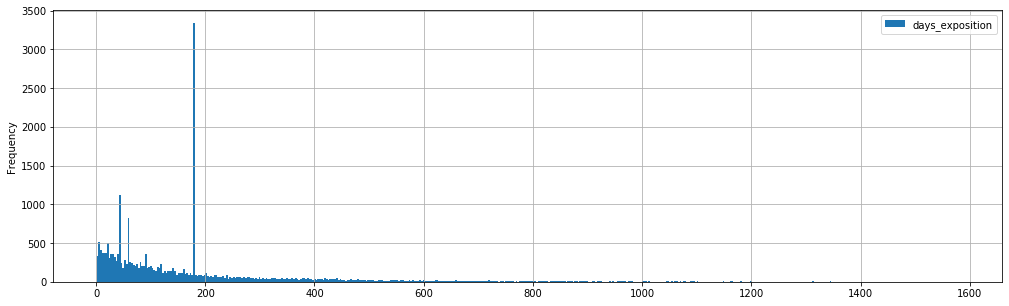

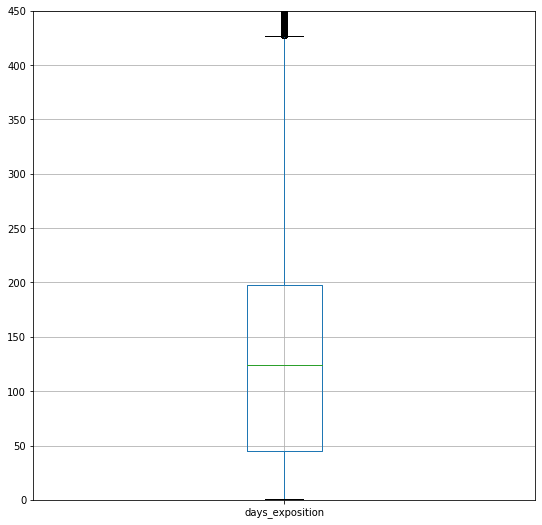

In [185]:
print(data['days_exposition'].describe()) #Получю описание столбца
print()
print('Среднее значение по столбцу "Сколько дней было размещено объявление"', data['days_exposition'].mean()) #Среднее
print('Медианное значение по столбцу "Сколько дней было размещено объявление"', data['days_exposition'].median()) #Медиана
data.plot(y='days_exposition', kind='hist', bins=500, figsize=(17,5), grid=True) #Строю гистограмму
plt.show()
data.boxplot('days_exposition', figsize=(9,9)) #Строю Диаграмму размаха
plt.ylim(0, 450) #Задаю диапазон построения Диаграммы размаха
plt.show()

#### Вывод по задаче 2.
По столбцу "Сколько дней было размещено объявление" получено описание, построена гистограмма и диаграмма размаха. На гистограмме четко видны последствия заполнения пропусков, а именно острый пик на среднем значении, однако, это значение находится в пределах 1-3 квартилей. На Диаграмме размаха видно, что нормальный срок продажи квартиры занимает от 45 до 198 дней. Аномально долгими продажами можно считать те, которые заняли больше 430 дней, аномально быстрыми - менее 2 дней.

#### Задача 3.
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

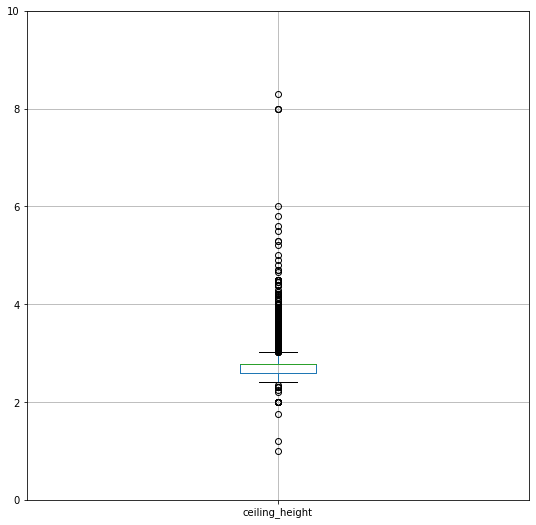

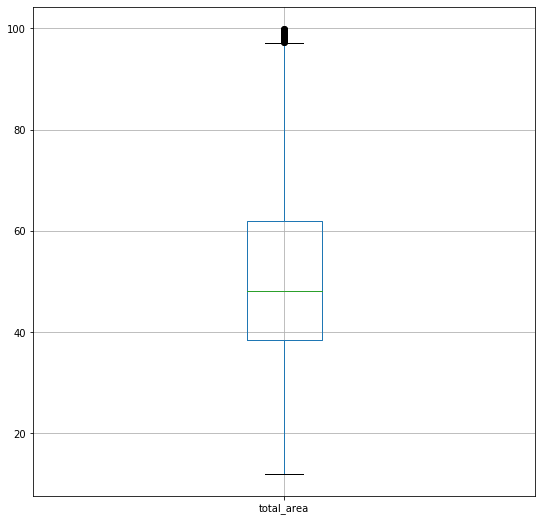

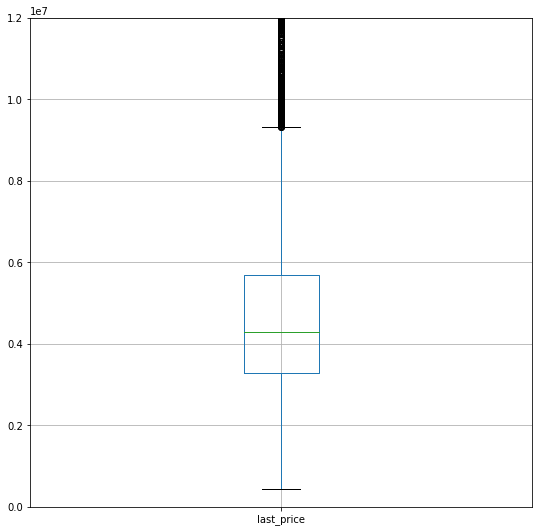

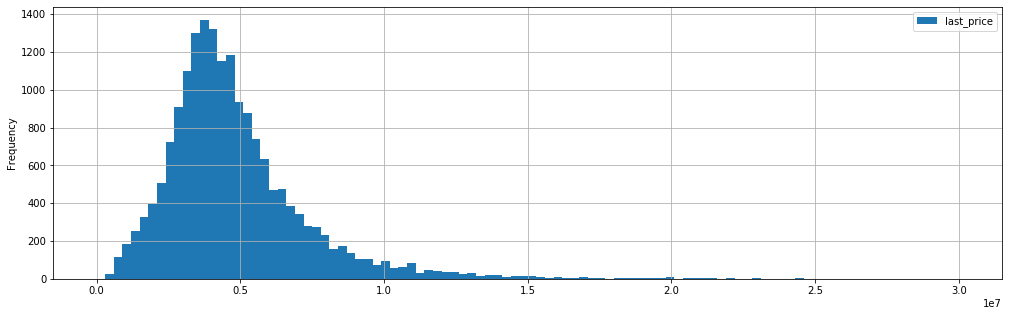

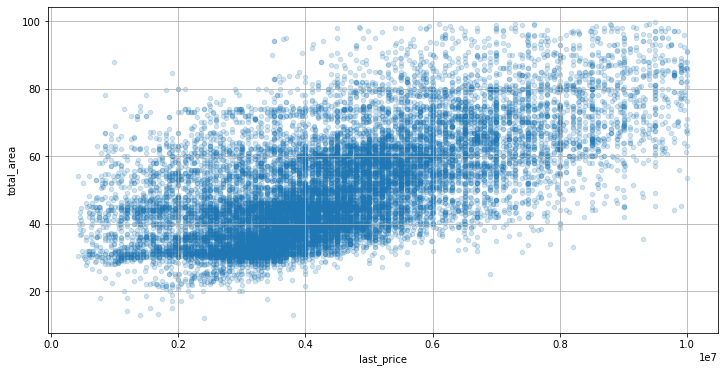

count    1.729800e+04
mean     4.463450e+06
std      1.826591e+06
min      4.300000e+05
25%      3.200000e+06
50%      4.200000e+06
75%      5.500000e+06
max      9.999999e+06
Name: last_price, dtype: float64


In [186]:
#Для столбца "Высота потолков" строю Диаграмму размаха
data.boxplot('ceiling_height', figsize=(9,9))
plt.ylim(0, 10) #Задаю предел по оси у, поскольку высоты потолков более 10 метров встречаются уже крайне редко
plt.show()
#Объявляю новое название для датасета Good_data и выполняю срез методом .query по "усам" диаграммы размаха
good_data = data.query('2.2<ceiling_height<3')
#Выполняю срез по столбцу "Общая площадь"
good_data = good_data.query('total_area < 100')
#Выполняю срез по столбцу "Число комнат"
good_data = good_data.query('0 < rooms < 9')
#Выполняю срез по столбцу "Сколько дней было размещено объявление"
good_data = good_data.query('2 <= days_exposition <= 430')

good_data.boxplot('total_area', figsize=(9,9))
plt.show()
#Для столбца "Цена на момент снятия с публикации" строю Диаграмму размаха
good_data.boxplot('last_price', figsize=(9,9))
plt.ylim(0, 12000000) #Задаю диапазон построения диаграммы размаха
plt.show()

good_data.plot(y='last_price', kind='hist', bins=100, range=(0,30000000), figsize=(17,5), grid=True) #Строю гистограмму

#Выполняю срез по столбцу "Число комнат", удаляя аномально высокие значения, выходящие за верхний "ус" диаграммы размаха
good_data = good_data.query('last_price < 10000000')
good_data.plot(x='last_price', y='total_area', style='o', kind='scatter', alpha=0.2, grid=True, figsize=(12, 6))  #Строю грфик
plt.show()
#good_data.plot(x='last_price', y='total_area', kind='hexbin', grid=True, figsize=(12, 6))
#Выполняю срез по столбцу "Число комнат", удаляя аномально низкое минимальное значение
good_data = good_data.query('last_price > 20000')
print(good_data['last_price'].describe()) #Получю описание столбца

#### Вывод по задаче 3.
Редкие и выбивающиеся значения были удалены из столбцов "Высота потолков", "Общая площадь", "Число комнат", "Сколько дней было размещено объявление", "Цена на момент снятия с публикации". из датасета удалены квартиры с аномальной высотой потолков менее 2.2 м и более 3 м, квартиры с редкой общей площадью > 100 м кв., квартиры с редким числом комнат - равном 0 и более 9, слишком быстро (менее 2-х дней) и слишком долго (более 430 дней) продававшиеся квартиры, а в конечном счете были удаленны квартиры стоимостью свыше свыше 10 000 000 и ниже 20 000.

#### Задача 4.
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

                     last_price  total_area  squre_m_price     rooms  \
last_price             1.000000    0.635472       0.639744  0.383676   
total_area             0.635472    1.000000      -0.146700  0.800128   
squre_m_price          0.639744   -0.146700       1.000000 -0.270878   
rooms                  0.383676    0.800128      -0.270878  1.000000   
cityCenters_nearest   -0.292490   -0.039548      -0.395444 -0.017011   

                     cityCenters_nearest  
last_price                     -0.292490  
total_area                     -0.039548  
squre_m_price                  -0.395444  
rooms                          -0.017011  
cityCenters_nearest             1.000000  


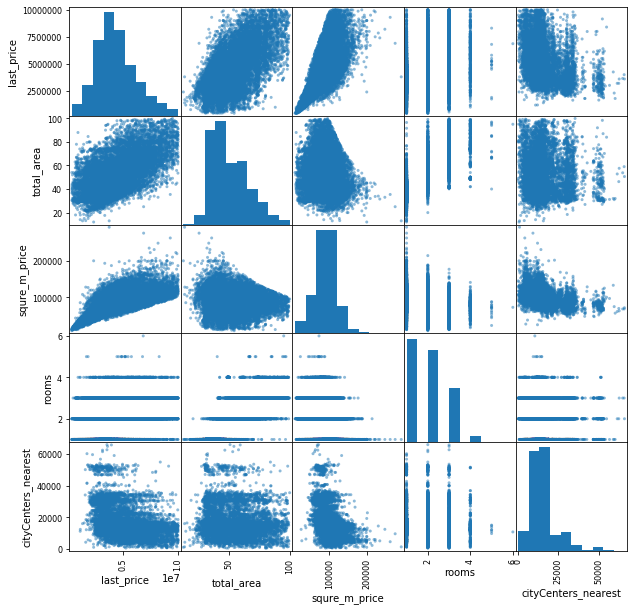

            last_price  floor_id
last_price     1.00000   0.04171
floor_id       0.04171   1.00000


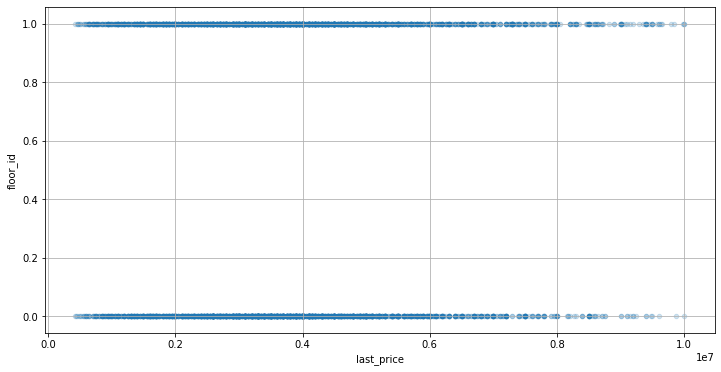

                last_price  week_day_expos  month_expos  year_expos
last_price        1.000000       -0.011868     0.004926    0.036766
week_day_expos   -0.011868        1.000000     0.009519   -0.011596
month_expos       0.004926        0.009519     1.000000   -0.305939
year_expos        0.036766       -0.011596    -0.305939    1.000000


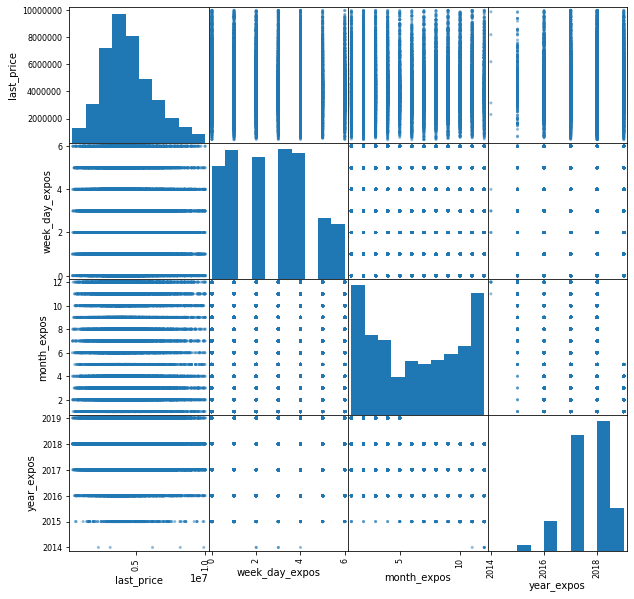


Средняя стоимость 1 м кв. в топ-10 насленных пунктов по количеству объявлений
                   squre_m_price
locality_name                   
санкт-петербург    103892.641052
пушкин              99549.579887
деревня кудрово     92224.310448
посёлок парголово   90258.195731
посёлок мурино      85340.089624
посёлок шушары      78494.344449
колпино             75326.181834
гатчина             68395.842161
всеволожск          66541.410946
выборг              57873.550765

Минимальная средняя стоимость 1 м кв. по всем насленным пунктам
                    squre_m_price
locality_name                    
деревня старополье   11206.221198

Максимальная средняя стоимость 1 м кв. по всем насленным пунктам
                   squre_m_price
locality_name                   
посёлок лисий нос   168706.69746


In [205]:
#Объявляю функцию присвоения id этажу расположения квартиры последний == 1, первый == 0, другой == 2 
def floor_id(row): 
    fl_id = row['floor_group']
    if fl_id == 'последний':
        return 1
    if fl_id == 'первый':
        return 0
    else:
        return 2
#Применяю функцию для присвоения id, добавляю в таблицу столбец 'floor_id'
good_data['floor_id'] = good_data.apply(floor_id,axis=1)

#Получаю срез данных из таблицы good_data
good_data_corr = good_data.loc[:, ['last_price', 'total_area', 'squre_m_price', 'rooms', 'cityCenters_nearest']]
#Нахожу коэффициенты корреляции Пирсона, печатаю матрицу корреляции
print(good_data_corr.corr())
pd.plotting.scatter_matrix(good_data_corr, figsize=(10, 10))
plt.show()

#Получаю срез данных из таблицы good_data для изучения зависимости last_price от floor_id, нахожу коэффициенты корреляции,
#печатаю матрицу корреляции
print(good_data.query('floor_id < 2').loc[:, ['last_price','floor_id']].corr())
(good_data
        .query('floor_id < 2')
        .plot(x='last_price', y='floor_id', style='o', kind='scatter', alpha=0.2, grid=True, figsize=(12, 6))
)
plt.show()

#Получаю срез данных из таблицы good_data для изучения зависимости last_price от момента размещения
good_data_expos = good_data.loc[:, ['last_price', 'week_day_expos', 'month_expos', 'year_expos']]
#Нахожу коэффициенты корреляции Пирсона, печатаю матрицу корреляции
print(good_data_expos.corr())
pd.plotting.scatter_matrix(good_data_expos, figsize=(10, 10))
plt.show()
print()

#Выбираю 10 населенных пунктов с наибольшим числом объявлений
top_location = good_data['locality_name'].value_counts().head(10)
#Создаю сводную таблицу по значаниям 'locality_name', входящим в top_location, вычисляю средние значения стоимости 1 м кв.
location_data = (good_data
        .query('locality_name in @top_location.index')
        .pivot_table(index='locality_name', values='squre_m_price', aggfunc='mean')
        .sort_values(by = 'squre_m_price', ascending = False)
)

print('Средняя стоимость 1 м кв. в топ-10 насленных пунктов по количеству объявлений')
print(location_data)
print()
#Определяю минимальную среднюю стоимость 1 м кв. по всем насленным пунктам
print('Минимальная средняя стоимость 1 м кв. по всем насленным пунктам')
print(good_data
        .pivot_table(index='locality_name', values='squre_m_price', aggfunc='mean')
        .query('squre_m_price == squre_m_price.min()')
)
print()
#Определяю максимальную среднюю стоимость 1 м кв. по всем насленным пунктам
print('Максимальная средняя стоимость 1 м кв. по всем насленным пунктам')
print(good_data
        .pivot_table(index='locality_name', values='squre_m_price', aggfunc='mean')
        .query('squre_m_price == squre_m_price.max()')
)

#### Вывод по задаче 4.
больше всего стоимость квартиры зависит ли цена от общей площади, что в целом очевидно, плюс к этому коэффициент корреляции между стоимостью и общей площадью достаточно высокий, он равен 0,6355. Меньше выражена зависимость от числа комнат, , этажа коэффициент корреляции здесь 0,3837. Обратную зависимость стоимость квартиры имеет от расстояния до центра города, то есть чем ближе к центру, тем дороже квартиры, однако здесь самый низкий из значимых коэффициентов корреляции, следовательно и зависимость низкая.
Зависимости от даты размещения: дня недели, месяца и года - а также от этажа (первого или последнего) отсутствуют, поскольку коэффициенты корреляции стремятся к нулю.
Далее были выбераны 10 населённых пунктов с наибольшим числом объявлений. Посчитана средняя цена квадратного метра в этих населённых пунктах. Наиболее низкая и наиболее высокая стоимость 1 кв. м оказалась в деревне Старополье и в посёлке Лисий нос соответственно.

#### Задача 5.
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге. Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра.

                      mean_price
distance_to_center              
0                   7.339944e+06
1                   7.239311e+06
2                   6.799621e+06
3                   6.425645e+06
4                   6.686523e+06
5                   6.633199e+06
6                   6.132398e+06
7                   6.083958e+06
8                   5.376570e+06
9                   4.997093e+06
10                  4.994663e+06
11                  5.111400e+06
12                  5.136067e+06
13                  5.274449e+06
14                  5.107839e+06
15                  4.984089e+06
16                  4.877990e+06
17                  4.557526e+06
18                  4.658125e+06
19                  4.657794e+06
20                  5.889530e+06
21                  4.953177e+06
22                  5.057400e+06
23                  4.232500e+06
24                  3.862235e+06
25                  4.000401e+06
26                  3.375000e+06
27                  2.250000e+06
28        

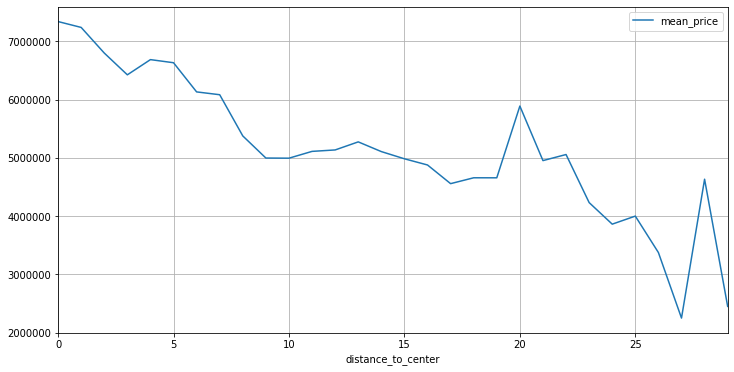

In [190]:
#Выделяю квартиры в Санкт-Петербурге, удаляю строки с пропущенными значениями
good_data_spb = (good_data
                 .query('locality_name == "санкт-петербург"')
                 .dropna(subset = ['cityCenters_nearest'])
)
#Создаю столбец с расстоянием до центра в километрах, округляю до целых значений. 
good_data_spb['distance_to_center'] = (good_data_spb['cityCenters_nearest']/1000).astype('int')
#Получаю сводную таблицу со средними значениями стоимость квартир относительно удаленности от центра
spb_distance_price = good_data_spb.pivot_table(index='distance_to_center', values=['last_price'], aggfunc='mean')
spb_distance_price.columns = ['mean_price']
#Печатаю график зависимости
spb_distance_price.plot(grid=True, figsize=(12, 6))
#Печатаю таблицу
print(spb_distance_price)

#### Вывод по задаче 5.
График наглядно показывает тренд на снижение стоимости жилья по мере удаления от центра, однако на нем имеются два пика на 20 и на 28 километрах в эти пики, вероятнее всего, попадает дорагая недвижимость в новых районах.

#### Задача 6.
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

count    1457.000000
mean       55.092224
std        17.395843
min        12.000000
25%        42.100000
50%        53.500000
75%        67.000000
max        99.300000
Name: total_area, dtype: float64

count    1.457000e+03
mean     6.227131e+06
std      1.838146e+06
min      1.686000e+06
25%      4.800000e+06
50%      6.190000e+06
75%      7.697000e+06
max      9.999000e+06
Name: last_price, dtype: float64

count    1457.000000
mean        1.978723
std         0.839586
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: rooms, dtype: float64

count    1457.000000
mean        2.725728
std         0.108635
min         2.400000
25%         2.700000
50%         2.771287
75%         2.771287
max         2.990000
Name: ceiling_height, dtype: float64
                    last_price  total_area     rooms  distance_to_center  \
last_price            1.000000    0.715981  0.431623           -0.267978   
total_area            0.715981    

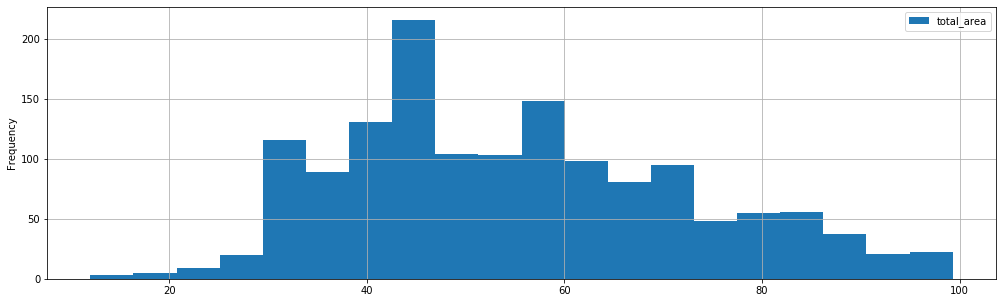

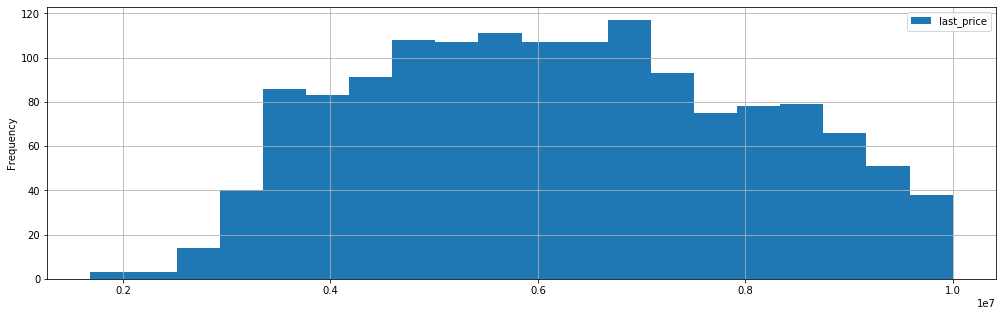

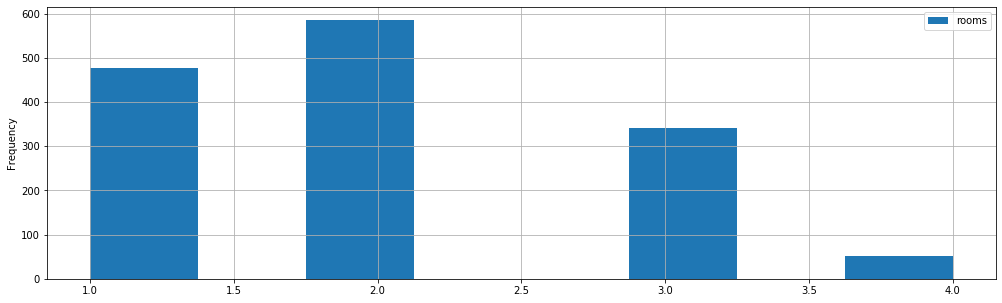

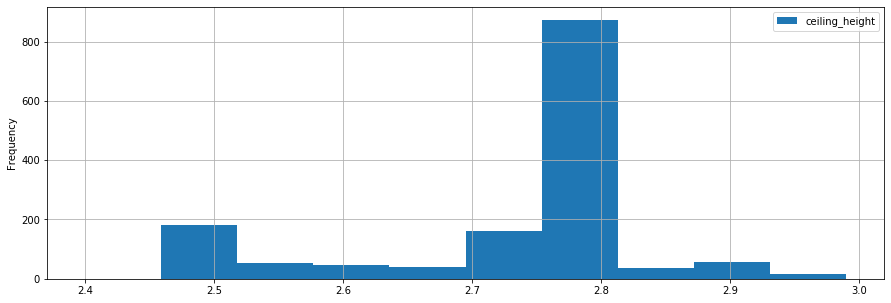

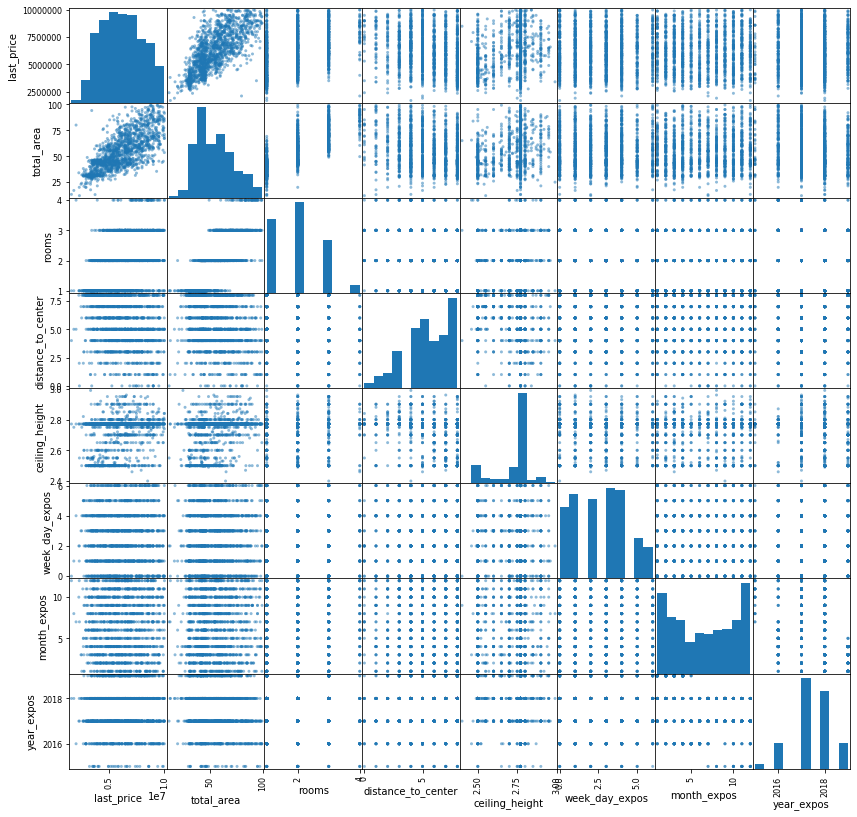

            last_price  floor_id
last_price    1.000000  0.216244
floor_id      0.216244  1.000000


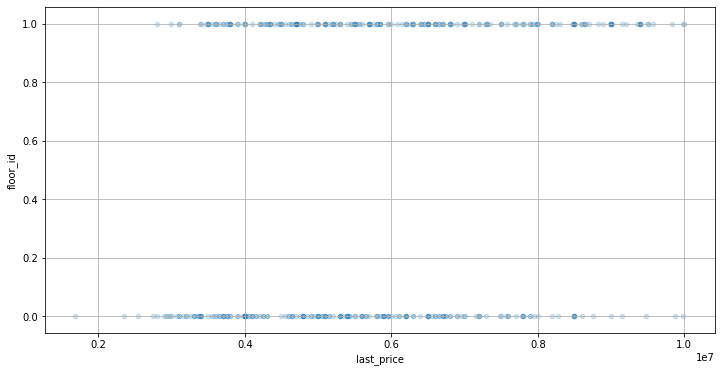

In [207]:
#Для решения этой задачи использую ранее составленную таблицу по Санкт-Петербургу.
#Определяю радиус центра города r=8 км, делаю срез данных по good_data_spb
spb_center = good_data_spb.query('distance_to_center <= 8')
print(spb_center['total_area'].describe()) #Получю описание столбца
spb_center.plot(y='total_area', kind='hist', bins=20, figsize=(17,5), grid=True) #Строю гистограмму
print()
print(spb_center['last_price'].describe()) #Получю описание столбца
spb_center.plot(y='last_price', kind='hist', bins=20, figsize=(17,5), grid=True) #Строю гистограмму
print()
print(spb_center['rooms'].describe()) #Получю описание столбца
spb_center.plot(y='rooms', kind='hist', bins=8, figsize=(17,5), grid=True) #Строю гистограмму
print()
print(spb_center['ceiling_height'].describe()) #Получю описание столбца
spb_center.plot(y='ceiling_height', kind='hist', bins=10, figsize=(15,5), grid=True) #Строю гистограмму

#Для определения зависимости стоимости квартиры от числа комнат, удалённости от центра, даты размещения объявления
#gолучаю срез данных из таблицы spb_center
spb_center_corr = spb_center.loc[:, ['last_price', 'total_area', 'rooms', 'distance_to_center', 'ceiling_height', 'week_day_expos', 'month_expos', 'year_expos']]
#Нахожу коэффициенты корреляции Пирсона, печатаю матрицу корреляции
print(spb_center_corr.corr())
pd.plotting.scatter_matrix(spb_center_corr, figsize=(14, 14))
plt.show()

#Получаю срез данных из таблицы spb_center для изучения зависимости last_price от floor_id, нахожу коэффициенты корреляции,
#печатаю матрицу корреляции
print(spb_center.query('floor_id < 2').loc[:, ['last_price','floor_id']].corr())
(spb_center
        .query('floor_id < 2')
        .plot(x='last_price', y='floor_id', style='o', kind='scatter', alpha=0.2, grid=True, figsize=(12, 6))
)
plt.show()

#### Вывод по задаче 6.
Выделен сегмент квартир в центре Санкт-Петербурга. Параметры площадь, цена, число комнат, распределились согласно нормальному распределению. Параметр высота потолков имеет явный пик на значениях, заполненных на этапе подготовки данных.
Рассмотрены зависимости стоимости квартир от площади, числа комнат, этажа (первый или последний), удалённости от центра, даты размещения объявления. Наиболее сильно стоимость квартиры зависит от площади и числа комнат. Невысокая обратная зависимость имеется от расстояния до центра города (чем ближе к центру, тем дороже), невысокая прямая зависимость от цены потолков. Также выявлена зависимость стоимости квартир от этажа расположения. На последних этажах квартиры имеют несколько более высокую стоимость, нежели на первых. От дня недели, месяца и года размещения объявления цена квартир не зависит. Рассмотренные параметры и зависимости одинаковы как для центрального района города, так и для других населенных пунктов.

### Шаг 5. Общий вывод

В рамках проекта решен ряд вопросов: изучение общей информации, предобработка данных, решение поставленных задач. Отмечу, что в исходных данных имеется значительная часть пропусков в столбцах, связанных с геоданными, вероятнее всего это результат некорректной работы автоматической системы получения картографических данных. Для оптимизации дальльнейшей работы следует улучшить данную систему. На этапе подготовки и обработки данных было выявлено и удалено определенное количество выбросов, то есть тех данных, которые выходят за рамки модели по тем или иным параметрам (стоимость, плоадь, количество дней до снятия объявления). Подобные выбросы можно тщательнее проверять в момент подачи объявлений. Контроль за остальными объявлениями можно автоматизировать. По результатам исследовательского анализа данных можно сделать вывод, что наиболее сильно стоимость квартиры зависит от площади и числа комнат. Невысокая обратная зависимость имеется от расстояния до центра города. Для оптимизации далнейшей работы можно сравнивать вновь поступившие объявления с полученными в проекте результатами. С учетом того, что данные по центру Санкт-Петербурга напрямую соотносятся с данными по всему городу в целом, то данную модель можно маштабировать для работы в других городах, независимо от их размера.